# KNN Algorithm

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_diabetes
dataset=load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [9]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [10]:
df['target']=dataset.target

In [11]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('target',axis=1))

StandardScaler()

In [14]:
scaled_data=scaler.transform(df.drop('target',axis=1))

In [15]:
df_feat=pd.DataFrame(scaled_data,columns=df.columns[:-1])

In [16]:
df_feat

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154


In [17]:
df_feat['target']=df['target']

In [18]:
df_feat

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508,178.0
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254,104.0
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674,132.0
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154,220.0


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_data,df['target'],
                                                    test_size=0.30)


In [22]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
y_pred=knn.predict(x_test)

In [24]:
y_pred

array([268., 202., 292.,  72., 115., 235., 195., 128., 153.,  43.,  69.,
        53., 121.,  42., 142., 293.,  85., 163., 108.,  65., 180., 121.,
       265., 141., 303., 151.,  71., 116., 100., 141., 274.,  93.,  61.,
       140., 210., 134.,  97., 222.,  63., 275., 277., 235.,  64., 111.,
       311., 303., 236., 122., 148., 109., 113., 168., 122.,  91.,  50.,
       100., 257.,  52., 135., 152.,  72., 180., 111.,  48., 181.,  92.,
       108., 104., 233.,  68., 122.,  72., 152.,  55.,  93., 103., 178.,
        84., 265., 235., 132., 109., 275., 303., 115., 321., 150.,  66.,
       141., 173., 202., 131.,  42.,  79.,  37., 173., 208., 142., 225.,
       107., 132.,  59.,  72.,  72., 128., 235., 183., 293., 138.,  64.,
       121., 272., 118., 178., 202.,  59., 232., 139.,  72.,  59., 128.,
        67.,  72.,  59., 181.,  72., 265., 122., 222., 178., 178., 197.,
       277.])

# Evaluation of KNN model

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


In [26]:

print(confusion_matrix(y_test,y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00         0
        40.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         1
        43.0       0.00      0.00      0.00         0
        44.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         2
        48.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         3
        50.0       0.00      0.00      0.00         0
        51.0       0.00      0.00      0.00         2
        52.0       0.00      0.00      0.00         0
        53.0       0.00      0.00      0.00         1
        54.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         1
        59.0       0.00      0.00      0.00         0
        60.0       0.00      0.00      0.00         1
        61.0       0.00      0.00      0.00         0
        63.0       0.00    

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.

# Choosing a k_value(suitable) 

In [30]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['target'],cv=5)
    accuracy_rate.append(score.mean())

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklea

Text(0, 0.5, 'Accuracy Rate')

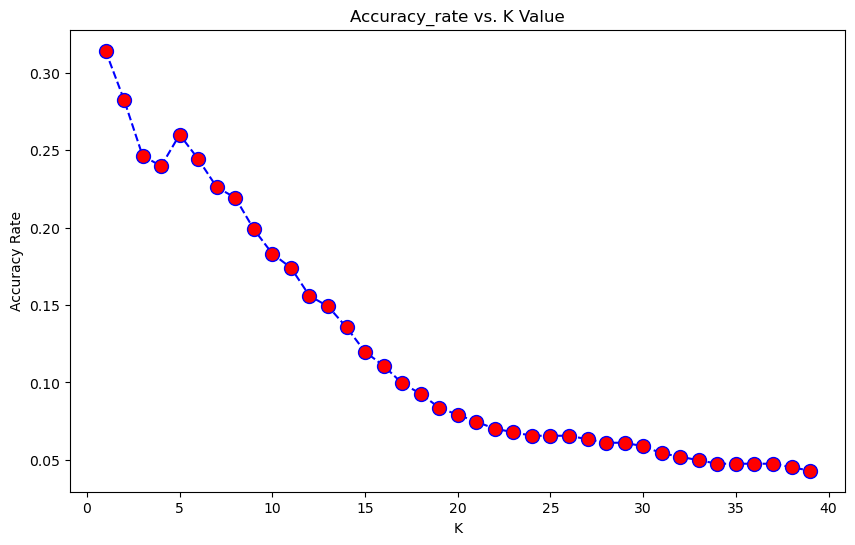

In [31]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [32]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))


WITH K=1


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00         0
        40.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         1
        43.0       0.00      0.00      0.00         0
        44.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         2
        48.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         3
        50.0       0.00      0.00      0.00         0
        51.0       0.00      0.00      0.00         2
        52.0       0.00      0.00      0.00         0
        53.0       0.00      0.00      0.00         1
        54.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         1
        59.0       0.00      0.00      0.00         0
  

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.

In [33]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=5


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00         0
        40.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         1
        43.0       0.00      0.00      0.00         0
        44.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         2
        48.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         3
        50.0       0.00      0.00      0.00         0
        51.0       0.00      0.00      0.00         2
        52.0       0.00      0.00      0.00         0
        53.0       0.00      0.00      0.00         1
        54.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         1
        59.0       0.00      0.00      0.00         0
  

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.